#### Hypothesis Testing
###### Sarah Musselwhite
###### 10/24/22

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('Data/insurance - insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.duplicated().sum()

1

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Question 1. Do smokers have higher insurance charges than non-smokers?
- Null Hypothesis: The insurance charge is not higher for smokers compared to non-smokers.

- Alternate Hypothesis: There is a higher insurance charge for smokers compared to non-smokers.

- Alpha= 0.05

##### We are going to test for normality and variance and use a T-test.

In [7]:
smoker = df.loc[df['smoker']== 'yes','charges']
non_smoker = df.loc[df['smoker']=='no','charges']
#Getting mean for smoker(yes/no) charges
print(f"For Smoker (n=l{len(smoker)}):Mean={np.mean(smoker):.2f}")
print(f"For Non-Smoker (n=l{len(non_smoker)}):Mean={np.mean(non_smoker):.2f}")

For Smoker (n=l274):Mean=32050.23
For Non-Smoker (n=l1063):Mean=8440.66


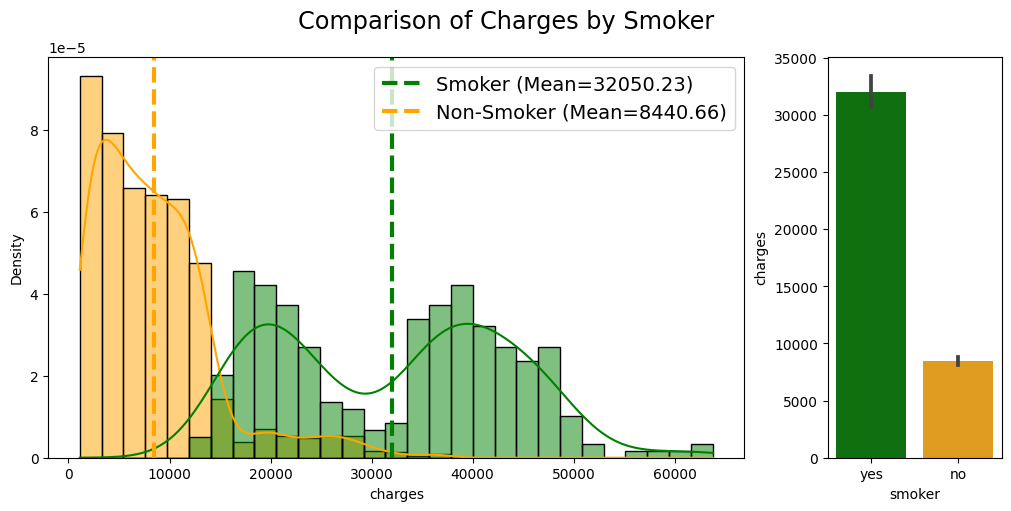

In [8]:
smoker_palette={'yes':'green', "no":'orange'}
## Visualizing Sample means
fig, (ax,ax_bar) = plt.subplots(figsize= (10,5), ncols=2, 
                                constrained_layout=True,
                                gridspec_kw={'width_ratios':[0.8,0.2]})


# Histogram
ax = sns.histplot(data=df,x='charges',fill=True,hue='smoker',kde=True,
                  stat='density',common_norm=False, ax=ax,
                  palette=smoker_palette)

ax.axvline(np.mean(smoker), ls='--',lw=3, 
           label=f"Smoker (Mean={np.mean(smoker):.2f})",color=smoker_palette['yes'])

ax.axvline(np.mean(non_smoker), ls='--', lw=3, 
           label=f"Non-Smoker (Mean={np.mean(non_smoker):.2f})",color=smoker_palette['no'])

ax.legend(prop={"size":14}, loc='upper right')#bbox_to_anchor=[1,1])
## Barplot
sns.barplot(data=df, x='smoker',y='charges',ax = ax_bar,palette=smoker_palette)
fig.suptitle('Comparison of Charges by Smoker',fontsize='xx-large');

In [9]:
#OUTLIERS SMOKERS?
zscores_smoker=stats.zscore(smoker)
outliers_smoker=abs(zscores_smoker)>3
np.sum(outliers_smoker)

0

In [10]:
#OUTLIERS NON-SMOKERS?
zscores_non_smoker=stats.zscore(non_smoker)
outliers_non_smoker= abs(zscores_non_smoker)>3
np.sum(outliers_non_smoker)

24

In [11]:
non_smoker.loc[~outliers_non_smoker]

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1039, dtype: float64

In [12]:
non_smoker - non_smoker.loc[~outliers_non_smoker]
non_smoker

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1063, dtype: float64

In [13]:
# normality for smokers
results_smoker= stats.normaltest(smoker)
results_smoker

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [14]:
# normality for non-smoker
result_non_smoker = stats.normaltest(non_smoker)
result_non_smoker

NormaltestResult(statistic=316.23579659917766, pvalue=2.1392881146814186e-69)

In [15]:
#checking for equal variance
result = stats.levene(smoker, non_smoker)
result

LeveneResult(statistic=332.47137394800666, pvalue=1.670117565125241e-66)

In [16]:
result=stats.ttest_ind(smoker,non_smoker,equal_var=False)
print(result)
result.pvalue < 0.05

Ttest_indResult(statistic=32.7423097372529, pvalue=6.261720774727631e-103)


True

- Since our p-value is less than 0.05 we reject the null hypothesis and accept the alternative hypothesis. Which means there is a higher insurance charge for smokers compared to non-smokers.

### Question 2: Are men more likely to smoke than women?
- Null hypothesis: Men are just as likely to be smokers as women.

- Alternate hypothesis: Men are more likely to smoke than women.

- Alpha = 0.05

In [17]:
#Converting smoker from yes/no to 0/1 for hypothesis testing
smoker_df = df
smoker_df['smoker'] = smoker_df['smoker'].apply(lambda x:0 if x=='no' else 1)
smoker_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


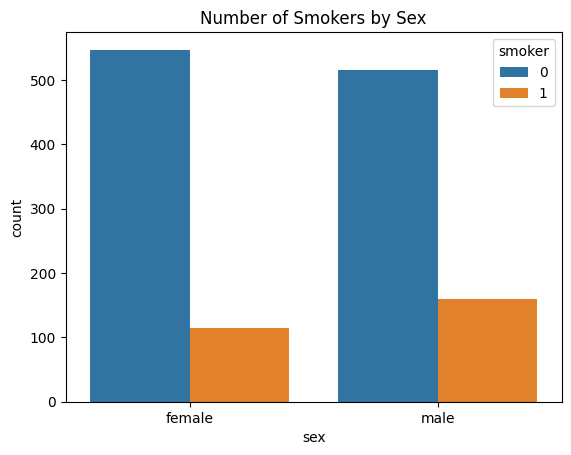

In [18]:
ax = sns.countplot(data=smoker_df, x='sex', hue='smoker')
ax.set_title('Number of Smokers by Sex');

In [19]:
# calculate the contingency table with pd.cross-tab
table =pd.crosstab(smoker_df['sex'],smoker_df['smoker'])
table

smoker,0,1
sex,,
female,547,115
male,516,159


In [20]:
#run the test and save the output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result

In [21]:
# What was our p-value?
print(p)
p<0.05

0.0062765550120107375


True

- The p-value is much less than 0.05 so we reject the null hypothesis and accept the alternate hypothesis that it is more likely that a male is a smoker moreso than a female.

### Question 3: Do different regions have different charges, average?
- Null hypothesis: There is no difference in the charges,on average based on the region.

- Alternate hypothesis: There is a different charge, on average based on the region.

- Alpha=0.05

In [22]:
#checking regions values counts
df['region'].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

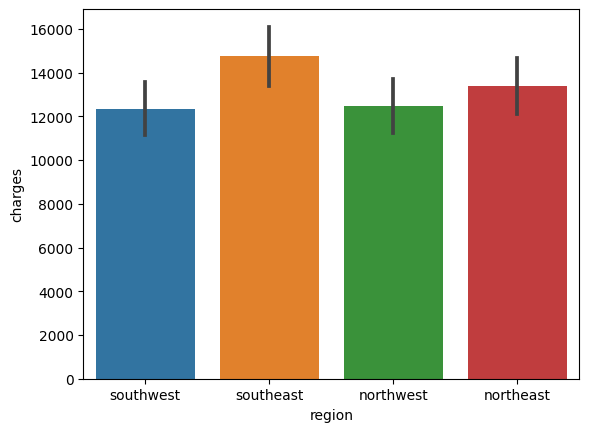

In [23]:
sns.barplot(data=df, x='region', y='charges');

In [24]:
## Create groups dictionary. There are only 4 groups, but this is even more helpful when there are many groups
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [25]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,324.0,6.502634e-24,106.779670
northeast,324.0,1.455431e-19,86.747629


In [26]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,324.0,6.502634e-24,106.779670,True
northeast,324.0,1.455431e-19,86.747629,True


In [27]:
stats.levene(*groups.values())

LeveneResult(statistic=5.553479860699911, pvalue=0.0008689544824002284)

In [28]:
# perform the correct hypothesis test
# note again the use of the * operator for convenience
result = stats.f_oneway( *groups.values())
result

F_onewayResult(statistic=2.926139903662776, pvalue=0.03276288025444947)

In [29]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
## save the values as charges and the labels to the region
values = df['charges']
labels = df['region']

In [30]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-955.5437,0.7457,-3397.7353,1486.648,False
northeast,southeast,1329.0269,0.4746,-1045.1237,3703.1776,False
northeast,southwest,-1059.4471,0.6793,-3499.7595,1380.8652,False
northwest,southeast,2284.5706,0.0643,-89.58,4658.7212,False
northwest,southwest,-103.9035,0.9995,-2544.2158,2336.4088,False
southeast,southwest,-2388.4741,0.0477,-4760.6915,-16.2567,True


- The results show that there is only a significant difference in region between southeast to southwest. We Fail to reject the null hypothesis due to there not being a difference in charges based on this region.